In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

invoice = pd.read_csv("fct_invoice.csv")
customer = pd.read_json("dim_customer.json")

invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
customer.rename(columns={"id": "customer_id"}, inplace = True)

customer

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [6]:
#Easy 1: How many unique customers are in the dataset

unique_customer = customer["customer_id"].nunique()

unique_customer

5191

In [8]:
#Easy 2: 
#What are the different categories of products available?
#How many unique categories are there?

unique_cats = pd.unique(invoice["category"])

print(unique_cats)
print(len(unique_cats))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [9]:
#Easy 3:
#Which payment method is the most popular?
#How many times was it used?

popular_method = invoice["payment_method"].value_counts()
popular_method.head(1)

Cash    44447
Name: payment_method, dtype: int64

In [10]:
#Medium 1:
#What are the three most popular categories by total sales?

invoice["sales"] = invoice["price"] * invoice["quantity"]
invoice.groupby("category")["sales"].sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [12]:
#Medium 2:
#What are the total sales attributed to customers over the age of 45?

id_above_45 = customer[customer["age"]>45]["customer_id"]
customer_over_45 = invoice[invoice["customer_id"].isin(id_above_45)]
customer_over_45["sales"].sum()

82039768.15

<function matplotlib.pyplot.show(close=None, block=None)>

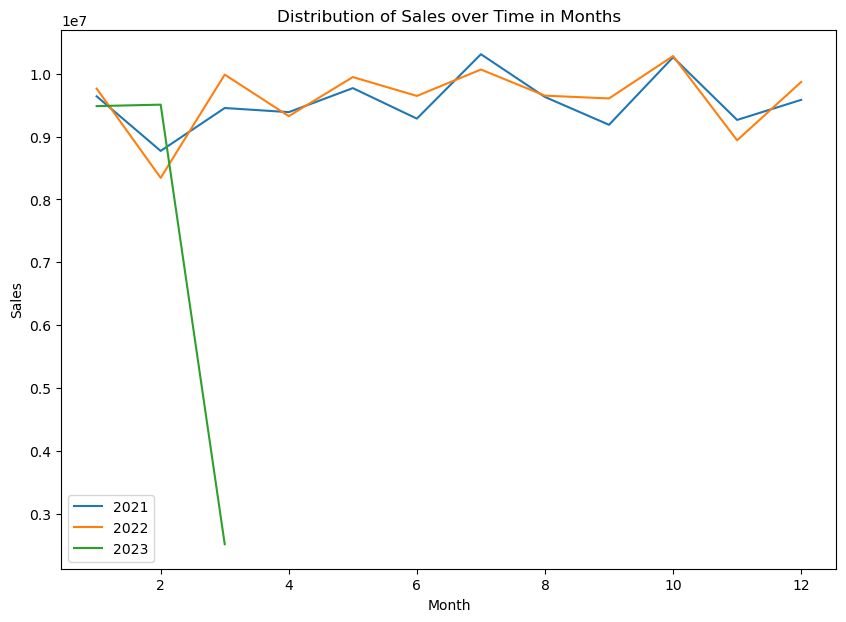

In [21]:
#Medium 3:
#How is the data distributed across different invoice dates?
#Are there any seasonal trends or patterns? (Use a graph for this.)

invoice["invoice_date"] = pd.to_datetime(invoice["invoice_date"], format = "%d/%m/%Y")

invoice["year"] = invoice["invoice_date"].dt.year
invoice["month"] = invoice["invoice_date"].dt.month

sales_distribution = invoice.groupby(["year", "month"])["sales"].sum()
sales_distribution = sales_distribution.unstack(level=0)

sales_distribution.plot(kind = "line", figsize=(10, 7))
plt.title("Distribution of Sales over Time in Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(["2021", "2022", "2023"])
plt.show

#Spikes in sales during March, May, July, October, and December for 2021 & 2022.
#Fall in sales during February, April, June, August, September, and November.
#July and October appear to have the highest amount of sales
#February appears to be the month with the least amount of sales

In [26]:
#Hard 1
#Create a pivot table showing the breakdown of sales across these dimensions
#in this order: catgeory, decade age range (e.g. 10-19, 20-29, and so forth).

df = pd.merge(invoice, customer, on = "customer_id", how = "inner")
df["age_range"] = pd.cut(df["age"], bins=range(0, 101, 10), right=False)
pivot_table = pd.pivot_table(df, values = "sales", index="age_range", columns="category", aggfunc="sum")
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
"[0, 10)",0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
"[10, 20)",12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
"[20, 30)",79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
"[30, 40)",84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
"[40, 50)",87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
"[50, 60)",74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
"[60, 70)",80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
"[70, 80)",54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
"[80, 90)",26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
